In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

colors = ['r', 'b', 'k', 'm']
ls = ['-','-.',':','--']

In [7]:
# Load iris flower data set
df = pd.read_csv('/Users/zhampel/machine-learning/data/iris.data')
print(df.tail())
# select only setosa and versicolor
y = df.iloc[0:99,4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal and petal lengths
X = df.iloc[0:99, [0, 2]].values
#Thus, only two features
n_features = 2

     5.1  3.5  1.4  0.2     Iris-setosa
144  6.7  3.0  5.2  2.3  Iris-virginica
145  6.3  2.5  5.0  1.9  Iris-virginica
146  6.5  3.0  5.2  2.0  Iris-virginica
147  6.2  3.4  5.4  2.3  Iris-virginica
148  5.9  3.0  5.1  1.8  Iris-virginica


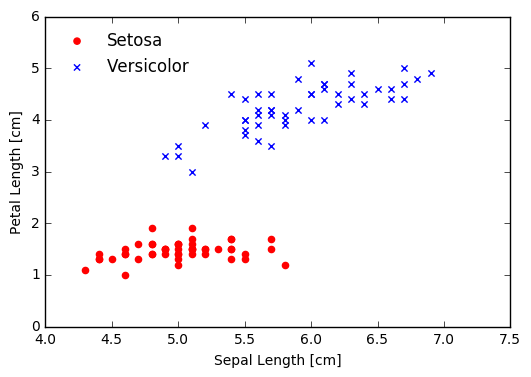

In [8]:
# Plot the data
plt.scatter(X[:49, 0], X[:49, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:99, 0], X[50:99, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/simple_iris_data.png")
plt.show()

In [9]:
class DecisionFunction(object):
    """Decision function class
    
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self,name=""):
        self.name_ = name
        self.print_name()
    
    def get_name(self):
        return self.name_
        
    def print_name(self):
        print("Using the %s decision function."%self.get_name())
        
    def activation(self, Z):
        """Undefined activation function
        """
        raise NotImplementedError()
        
    def decision(self, y):
        """Undefined decision function
        """
        raise NotImplementedError()
        
    def error(self, Y, Z):
        phi = self.activation(Z)
        err = Y-phi
        return err
    
    def cost(self, Y, X):
        return self.error(Y, X)**2

        
class UnitStep(DecisionFunction):
    """Unit step function"""
    def __init__(self):
        self.name_ = "UnitStep"
        
    def activation(self, Z):
        return Z
    
    def decision(self, Z):
        return np.where(self.activation(Z)>=0.0, 1, -1)
    
    def error(self, Y, X):
        Z = self.activation(X)
        err = Y-self.decision(Z)
        return err
        
class AdaLine(DecisionFunction):
    """Adaptive linear function"""
    def __init__(self):
        self.name_ = "AdaLine"
    
    def activation(self, Z):
        return Z
    
    def decision(self, Z):
        return np.where(self.activation(Z)>=0.0, 1, -1) #0) #-1)
        #return self.activation(Z)

    
class Logistic(DecisionFunction):
    """Logistic regression function"""
    def __init__(self):
        self.name_ = "Logistic"
    
    def activation(self, Z):
        return 1/(1+np.exp(-Z))
    
    def decision(self, Z):
        return np.where(self.activation(Z)>=0.5, 1, 0)
    
    def cost(self, Y, Z):
        phi = self.activation(Z)
        return -Y * np.ln(phi) - (1-Y) * np.ln(1-phi)

class ArcTan(DecisionFunction):
    """Arctangent function"""
    def __init__(self):
        self.name_ = "Arctangent"
    
    def activation(self, Z):
        return np.arctan(Z)
    
    def decision(self, Z):
        return np.where(self.activation(Z)>=0.0, 1, -1)

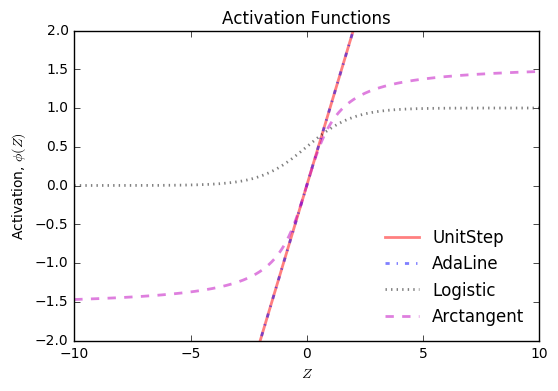

In [10]:
# Initialize some decision functions
udecide = UnitStep()
adecide = AdaLine()
ldecide = Logistic()
arcdecide = ArcTan()
dec_list = [udecide, adecide, ldecide, arcdecide]

# Plot different activations
x = np.linspace(-10,10,1000)
for di, fdec in enumerate(dec_list):
    plt.plot(x, fdec.activation(x), color=colors[di], ls=ls[di], label=fdec.get_name(), alpha=0.5, lw=2)
plt.xlabel('$Z$')
plt.ylabel('Activation, $\phi(Z)$')
plt.title('Activation Functions')
plt.xlim(-10,10)
plt.ylim(-2,2)
#plt.grid(True)
plt.legend(loc='lower right', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/activation_functions.png")
plt.show()

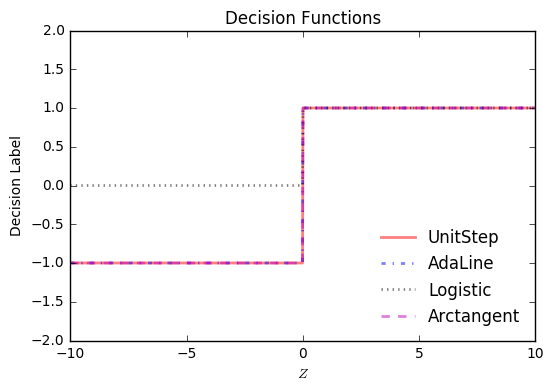

In [11]:
# Plot different activations
x = np.linspace(-10,10,1000)
for di, fdec in enumerate(dec_list):
    plt.plot(x, fdec.decision(x), color=colors[di], ls=ls[di], label=fdec.get_name(), alpha=0.5, lw=2)
plt.xlabel('$Z$')
plt.ylabel('Decision Label')
plt.title('Decision Functions')
plt.xlim(-10,10)
plt.ylim(-2,2)
#plt.grid(True)
plt.legend(loc='lower right', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/decision_functions.png")
plt.show()

In [12]:
class Perceptron(object):
    """Simple Perceptron Classifier Model
    
    Parameters
    ----------
    decider : class DecisionFunction
      Type of decision function
    random_seed : int
      Random number seed for reproduceability
      of random weight initialization
      
    Attributes
    ----------
    n_features_ : int
      Number of input features
    w_ : 1-d float array
      Weights vector
    """
    
    # Initialize parameters and weights
    def __init__(self, n_features=None, decider=None, random_seed=1):
        self.decider = decider
        self.n_features_ = n_features
        self.random_seed = random_seed
        self.print_info()
        self.init_weights()

    def print_info(self):
        print('A simple perceptron with %i features using the %s decision function'
              %(self.n_features_,decider.get_name()))
        
    def init_weights(self):
        """Initialize weights"""
        if (self.n_features_ is None):
            raise TypeError("n_features not provided in initalization")
            
        rgen = np.random.RandomState(self.random_seed)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=1+self.n_features_)
        
    def get_weights(self):
        """Return vector of weights"""
        return self.w_
    
    def learn_rule(self, eta, xi, yi):
        """Gradient descent: update weights
        Parameters
        ----------
        eta: float
          learning rate
        xi : 1-d float array
          input feature vector of single sample
        yi : float
          truth value for sample
        """
        #zi = self.net_input(xi)
        #err = self.decider.error(yi, zi) #yi - self.decider.decision(zi)
        #err = yi - self.decider.decision(zi)
        #zi = self.net_input(xi)
        err = self.error(yi, xi)
        upd = eta * err
        self.w_[1:] += upd * xi
        self.w_[0] += upd
        return err
        #return int(upd != 0.0)
    
    def net_input(self, X):
        """Weigh input feature values
        """
        return self.w_[0] + np.dot(X,self.w_[1:])
    
    def activation(self, X):
        """Activation function given input X
        """
        return self.decider.activation(self.net_input(X))
    
    def decision(self, X):
        """Decision function given input X
        """
        return self.decider.decision(self.net_input(X))
    
    def error(self, Y, X):
        """Error function given Y, X
        """
        Z = self.net_input(X)
        return self.decider.error(Y, Z)

In [13]:
class Learner(object):
    """Learning functionality
    
    Parameters
    ----------
    eta : float 
      Learning rate (0.0,1.0]
    n_iter: int
      Number of passes over the data set
    random_seed : int
      Random number seed for reproduceability
      of random weight initialization
      
    Attributes
    ----------
    n_features_ : int
        Number of input features
    errors_ : list
      Number of misclassifications (updates)
      in each epoch
    """
    
    def __init__(self, perceptron=None, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        self.perceptron = perceptron
        self.errors_ = []
        self.costs_ = []
        
    def reset(self):
        print('Reinitializing random weights.')
        self.perceptron.init_weights()
        self.errors_ = []
        
    def get_errors(self):
        return self.errors_
    
    def get_costs(self):
        return self.costs_
    
    def fit(self, x_data, y_data):
        """ Fitting function for learning
        Parameters:
        -----------
        x_data: 2-D array
          input sample data; shape = (n_features, n_samples)
        y_data: 1-D array
          truth values; shape = (n_samples)
        """
        for _ in range(self.n_iter):
            errors = 0
            cost = 0
            for xi, yi in zip(x_data, y_data):
                err = self.perceptron.learn_rule(self.eta, xi, yi)
                errors += err
                cost += err**2 / 2
                
            self.errors_.append(errors)
            self.costs_.append(cost)
            
    def evaluate(self, x):
        """Given an example, x, predict output
        """
        return self.perceptron.decision(x)
    
    def get_final_weights(self):
        """Get weights of trained perceptron
        """
        return self.perceptron.get_weights()

In [56]:
# Define learner with specified perceptron
#decider = UnitStep()
#decider = ArcTan()
decider = AdaLine()
#decider = Logistic()

# Instantiate two learners
n_iter = 30
eta_test = 0.001
spercep1 = Perceptron(n_features=n_features, decider=decider, random_seed=2)
learn = Learner(spercep1, eta=eta_test, n_iter=n_iter)
spercep2 = Perceptron(n_features=n_features, decider=decider)
learn_mislabel = Learner(spercep2, eta=eta_test, n_iter=n_iter)

A simple perceptron with 2 features using the AdaLine decision function
A simple perceptron with 2 features using the AdaLine decision function


In [57]:
# Correct, separable data set
X_train = X.copy()
y_train = y.copy()
#y_train[y_train==-1] = 0 # For adaline and logistic act. functions

learn.reset()
learn.fit(X_train,y_train)

# Mislabelled, inseparable data set
y_train_mislabel = y_train.copy()
#y_train_mislabel[-3:] *= 0#-1
y_train_mislabel[-3:] *= -1
learn_mislabel.reset()
learn_mislabel.fit(X_train,y_train_mislabel)

Reinitializing random weights.
Reinitializing random weights.


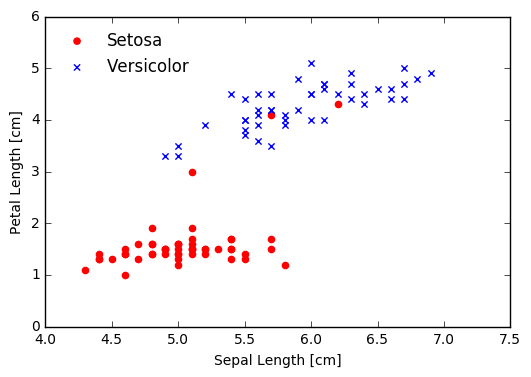

In [58]:
# Plot the data
plt.scatter(X[:49, 0], X[:49, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[-3:, 0], X[-3:, 1], color='red', marker='o')
plt.scatter(X[50:96, 0], X[50:96, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/mislabel_iris_data.png")
plt.show()

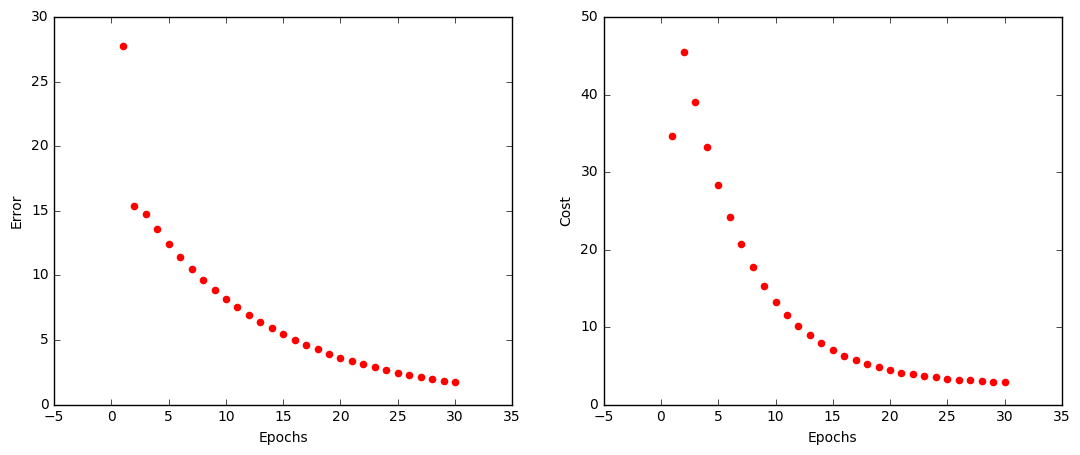

In [59]:
# Plot the data
f = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(range(1, n_iter+1), np.abs(learn.get_errors()), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.subplot(1,2,2)
plt.scatter(range(1, n_iter+1), learn.get_costs(), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.savefig("images/notebook/%s_cost_errors_eta%.03f.png"%(decider.get_name(),eta_test))
plt.show()

A simple perceptron with 2 features using the AdaLine decision function
Reinitializing random weights.


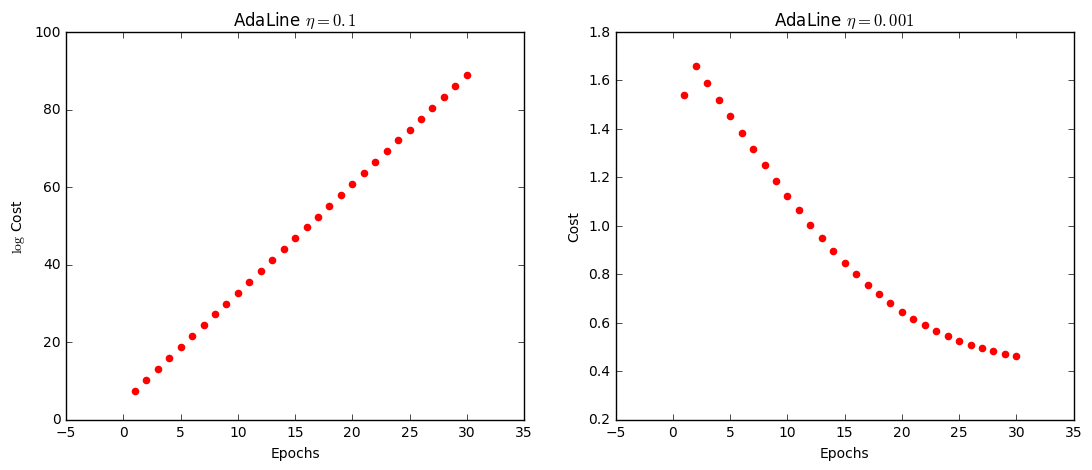

In [61]:
n_iter = 30
eta_test = 0.04
spercepx = Perceptron(n_features=n_features, decider=decider, random_seed=2)
learn_bad = Learner(spercepx, eta=eta_test, n_iter=n_iter)
learn_bad.reset()
learn_bad.fit(X_train,y_train)

# Plot the data
f = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(range(1, n_iter+1), np.log10(learn_bad.get_costs()), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel(r'$\log$ Cost')
plt.title(r'AdaLine $\eta = 0.1$')
plt.subplot(1,2,2)
plt.scatter(range(1, n_iter+1), np.log10(learn.get_costs()), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel(r'Cost')
plt.title(r'AdaLine $\eta = 0.001$')
plt.savefig("images/notebook/%s_cost_comparison.png"%(decider.get_name()))
plt.show()

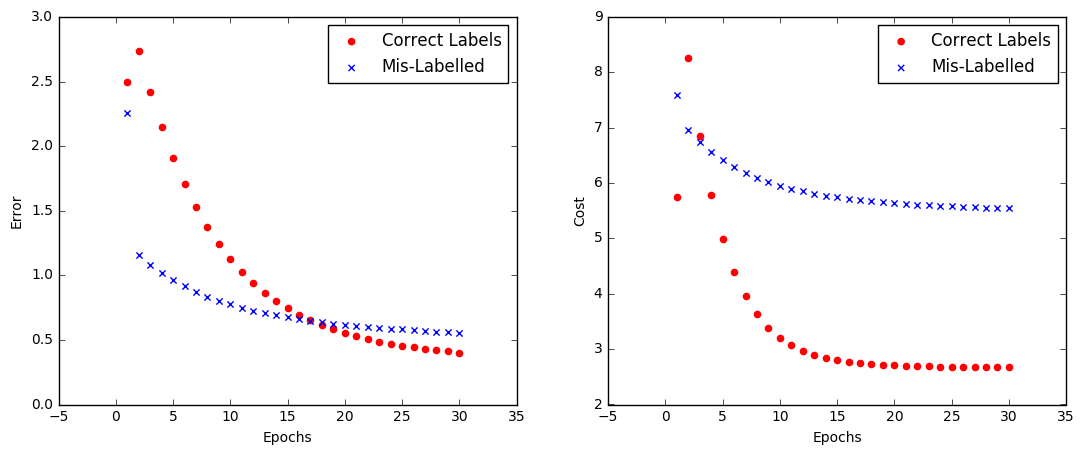

In [29]:
# Plot the data
f = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(range(1, n_iter+1), np.abs(learn.get_errors()), color='red', marker='o', label='Correct Labels')
plt.scatter(range(1, n_iter+1), np.abs(learn_mislabel.get_errors()), color='blue', marker='x', label='Mis-Labelled')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(loc='upper right', numpoints=1, scatterpoints=1)#, frameon=False)
plt.subplot(1,2,2)
plt.scatter(range(1, n_iter+1), learn.get_costs(), color='red', marker='o', label='Correct Labels')
plt.scatter(range(1, n_iter+1), learn_mislabel.get_costs(), color='blue', marker='x', label='Mis-Labelled')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend(loc='upper right', numpoints=1, scatterpoints=1)#, frameon=False)
plt.savefig("images/notebook/mislabel_%s_cost_errors_eta%.03f.png"%(decider.get_name(),eta_test))
plt.show()

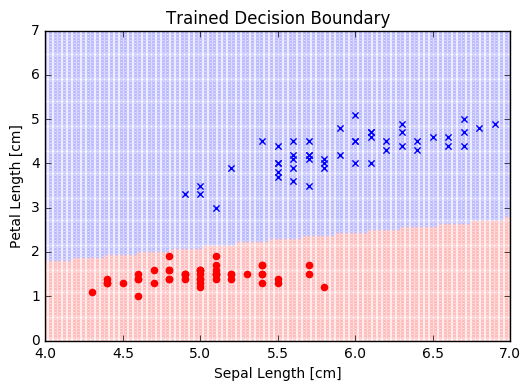

In [30]:
# Test the final weights by evaluating on a grid
s_test = np.linspace(4.0,7.0,100)
p_test = np.linspace(0.0,7.0,100)
XX, YY = np.meshgrid(s_test,p_test)
XX = XX.reshape((np.prod(XX.shape),))
YY = YY.reshape((np.prod(YY.shape),))
X_test = np.asarray(zip(XX,YY))
y_test = np.zeros(len(X_test))

# Evaluate the perceptron function
y_test = learn.evaluate(X_test)
#satp = (y_test==-1)
#versp = (y_test==1)
satp = (y_test<0)
versp = (y_test>=0)

# Plot the data
plt.scatter(X[:49, 0], X[:49, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:99, 0], X[50:99, 1], color='blue', marker='x', label='Versicolor')
plt.scatter(XX[satp], YY[satp], color='red', marker='.', label='Setosa - Predicted', alpha=0.125)
plt.scatter(XX[versp], YY[versp], color='blue', marker='.', label='Versicolor - Predicted', alpha=0.125)
plt.xlim(4,7)
plt.ylim(0,7)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.title('Trained Decision Boundary')
#plt.legend(loc='upper left', numpoints=1, scatterpoints=1, frameon=False)
plt.show()

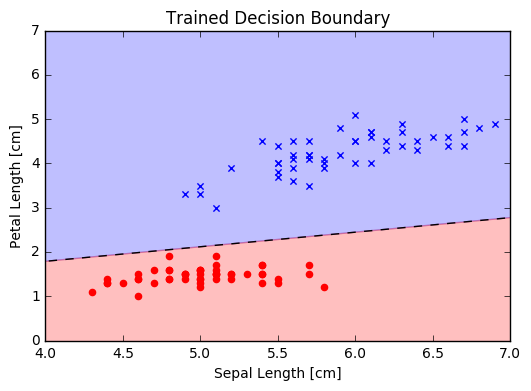

In [31]:
# Get final weights to draw decision linear boundary
weights = learn.get_final_weights()
x_bound = np.linspace(0,10,10)
#dec_bound1 = -weights[0]-weights[1]/weights[2]*x_bound
dec_bound = -(weights[0]+weights[1]*x_bound)/weights[2]

# Plot the data
plt.plot(x_bound, dec_bound, color='k', ls='--', label='Decision Boundary')
plt.scatter(X[:49, 0], X[:49, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:99, 0], X[50:99, 1], color='blue', marker='x', label='Versicolor')
plt.fill_between(x_bound, 100*np.ones(x_bound.shape), dec_bound, color='b', alpha=0.25)
plt.fill_between(x_bound,-100*np.ones(x_bound.shape), dec_bound, color='r', alpha=0.25)
plt.xlim(4,7)
plt.ylim(0,7)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.title('Trained Decision Boundary')
#plt.legend(loc='upper left', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/%s_decision_boundary.png"%(decider.get_name()))
plt.show()

In [62]:
# Visualize Classification Learning Process

from IPython import display
import time

# Sleepy time
sleep_time = 0.125

# Define learner with specified perceptron
#decider = UnitStep()
#decider = ArcTan()
decider = AdaLine()
#decider = Logistic()

# Instantiate two learners
over_iter = 30
n_iter = 1
eta = 0.01
spercep3 = Perceptron(n_features=n_features, decider=decider)
slow_learn = Learner(spercep3, eta=eta, n_iter=n_iter)
slow_learn.reset()

# Correct, separable data set
X_train = X.copy()
y_train = y.copy()
#y_train[0:5] *= -1
# For Adaline and Logistic functions
set_val = -1
#set_val = 0
y_train[y_train==-1] = set_val

# Train by looping outside of slow_learn 
# to get results at each iteration
for ii in range(over_iter):
    # Fit one iteration
    slow_learn.fit(X_train,y_train)
    # Get weights to draw decision linear boundary
    weights = slow_learn.get_final_weights()
    x_bound = np.linspace(0,10,10)
    dec_bound = -(weights[0]+weights[1]*x_bound)/weights[2]

    # Plot the data and decision regions
    plt.plot(x_bound, dec_bound, color='k', ls='--', label='Decision Boundary')
    plt.scatter(X_train[(y_train==set_val)][:,0], X_train[(y_train==set_val)][:,1], 
                color='red', marker='o', label='Setosa')
    plt.scatter(X_train[(y_train==1)][:,0], X_train[(y_train==1)][:,1], color='blue', marker='x', label='Versicolor')
    plt.fill_between(x_bound, 100*np.ones(x_bound.shape), dec_bound, color='b', alpha=0.25)
    plt.fill_between(x_bound,-100*np.ones(x_bound.shape), dec_bound, color='r', alpha=0.25)
    plt.xlim(4,7)
    plt.ylim(0,7)
    plt.xlabel('Sepal Length [cm]')
    plt.ylabel('Petal Length [cm]')
    plt.title('Trained Decision Boundary at Iteration %i'%(ii))
    plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(sleep_time)

A simple perceptron with 2 features using the AdaLine decision function
Reinitializing random weights.


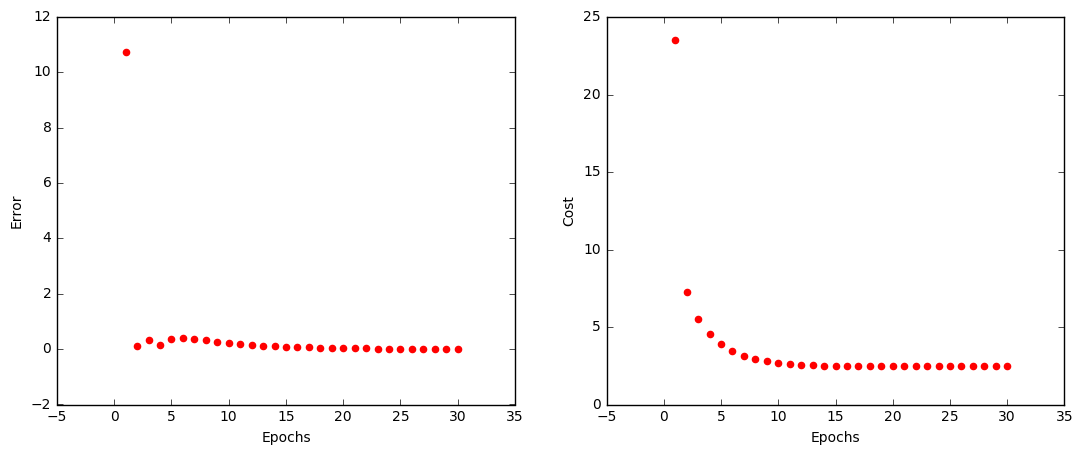

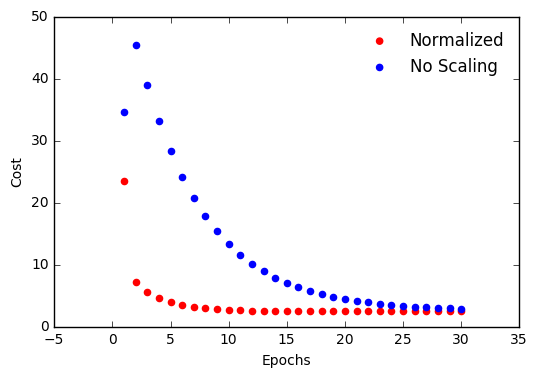

In [72]:
# Visualize Classification Learning Process
# Normalized Data Set

from IPython import display
import time

# Sleepy time
sleep_time = 0.125

# Define learner with specified perceptron
#decider = UnitStep()
#decider = ArcTan()
decider = AdaLine()
#decider = Logistic()

# Instantiate two learners
over_iter = 30
n_iter = 1
eta = 0.01
spercep3 = Perceptron(n_features=n_features, decider=decider)
slow_learn = Learner(spercep3, eta=eta, n_iter=n_iter)
slow_learn.reset()

# Correct, separable data set
X_train = X.copy()
X_train[:,0] = (X_train[:,0] - X_train[:,0].mean()) / X_train[:,0].std()
X_train[:,1] = (X_train[:,1] - X_train[:,1].mean()) / X_train[:,1].std()
y_train = y.copy()
#y_train[0:5] *= -1
# For Adaline and Logistic functions
set_val = -1
#set_val = 0
y_train[y_train==-1] = set_val

# Plot the data
plt.scatter(X_train[:49, 0], X_train[:49, 1], color='red', marker='o', label='Setosa')
plt.scatter(X_train[50:99, 0], X_train[50:99, 1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/simple_norm_iris_data.png")


# For boundary evaluation

x_bound = np.linspace(-10,10,10)
# Train by looping outside of slow_learn 
# to get results at each iteration
for ii in range(over_iter):
    # Fit one iteration
    slow_learn.fit(X_train,y_train)
    # Get weights to draw decision linear boundary
    weights = slow_learn.get_final_weights()
    dec_bound = -(weights[0]+weights[1]*x_bound)/weights[2]

    # Plot the data and decision regions
    plt.plot(x_bound, dec_bound, color='k', ls='--', label='Decision Boundary')
    plt.scatter(X_train[(y_train==set_val)][:,0], X_train[(y_train==set_val)][:,1], 
                color='red', marker='o', label='Setosa')
    plt.scatter(X_train[(y_train==1)][:,0], X_train[(y_train==1)][:,1], color='blue', marker='x', label='Versicolor')
    plt.fill_between(x_bound, 100*np.ones(x_bound.shape), dec_bound, color='b', alpha=0.25)
    plt.fill_between(x_bound,-100*np.ones(x_bound.shape), dec_bound, color='r', alpha=0.25)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.xlabel('Sepal Length [cm]')
    plt.ylabel('Petal Length [cm]')
    plt.title('Trained Decision Boundary at Iteration %i'%(ii))
    plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(sleep_time)


n_iter = 30
spercep3_1 = Perceptron(n_features=n_features, decider=decider)
slow_learn = Learner(spercep3_1, eta=eta, n_iter=over_iter)
slow_learn.reset()
slow_learn.fit(X_train,y_train)
# Plot the data
f = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(range(1, n_iter+1), np.abs(slow_learn.get_errors()), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.subplot(1,2,2)
plt.scatter(range(1, n_iter+1), slow_learn.get_costs(), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.savefig("images/notebook/%s_norm_data_cost_errors_eta%.03f.png"%(decider.get_name(),eta_test))
plt.show()

# Plot the data
f = plt.figure(figsize=(6,4))
plt.scatter(range(1, n_iter+1), slow_learn.get_costs(), color='red', marker='o', label='Normalized')
plt.scatter(range(1, n_iter+1), learn.get_costs(), color='blue', marker='o', label='No Scaling')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend(loc='upper right', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/%s_norm_cost_comparison.png"%(decider.get_name()))
plt.show()

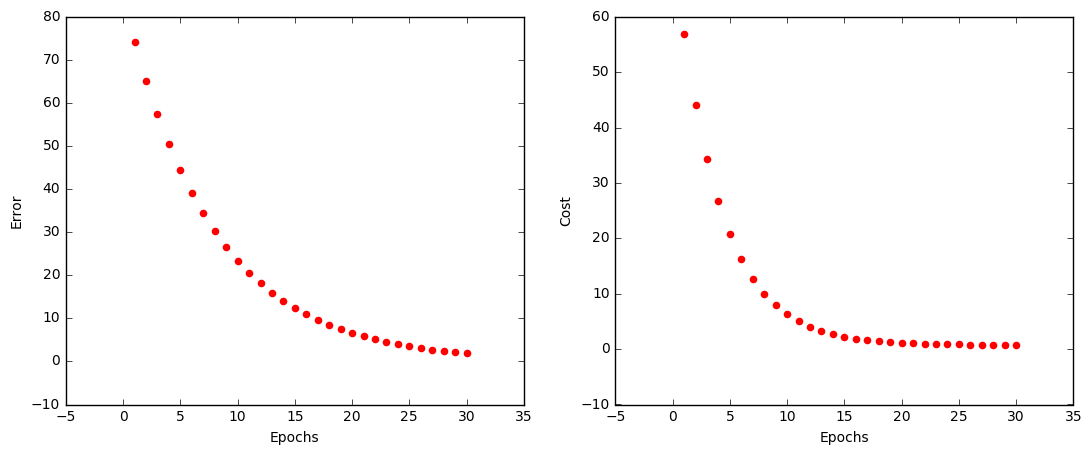

In [84]:
# Visualize Regression Learning Process

from IPython import display
import time

# Sleepy time
sleep_time = 0.25

# Define learner with specified perceptron
# Only works with AdaLine because continuity
# of decision function
decider = AdaLine()

# Instantiate two learners
over_iter = 30
n_iter = 1
eta = 0.0001
spercep4 = Perceptron(n_features=n_features-1, decider=decider)
slow_learn = Learner(spercep4, eta=eta, n_iter=n_iter)
slow_learn.reset()

# Just getting Setosa values
X_train = X[0:49, 0].copy()
y_train = X[0:49, 1].copy()

# Plot the data
plt.scatter(X[:49, 0], X[:49, 1], color='red', marker='o', label='Setosa')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.xlim(4,7)
plt.ylim(0,6)
plt.legend(loc='upper left', numpoints=1, scatterpoints=1, frameon=False)
plt.savefig("images/notebook/setosa_data.png")
plt.show()

# Train by looping outside of slow_learn 
# to get results at each iteration
for ii in range(over_iter):
    # Fit one iteration
    slow_learn.fit(X_train,y_train)
    # Get weights to draw decision linear boundary
    weights = slow_learn.get_final_weights()
    x_bound = np.linspace(0,10,10)
    dec_bound = weights[0]+weights[1]*x_bound
    print weights

    # Plot the data and decision regions
    plt.plot(x_bound, dec_bound, color='k', ls='--', label='Decision Boundary')
    plt.scatter(X_train, y_train, color='red', marker='o', label='Setosa')
    plt.xlim(4,7)
    plt.ylim(0,7)
    plt.xlabel('Sepal Length [cm]')
    plt.ylabel('Petal Length [cm]')
    plt.title('Trained Decision Boundary at Iteration %i'%(ii))
    plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(sleep_time)


# Plot the data
f = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(range(1, over_iter+1), np.abs(slow_learn.get_errors()), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.subplot(1,2,2)
plt.scatter(range(1, over_iter+1), slow_learn.get_costs(), color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.savefig("images/notebook/%s_regression_cost_errors_eta%.03f.png"%(decider.get_name(),eta_test))
plt.show()

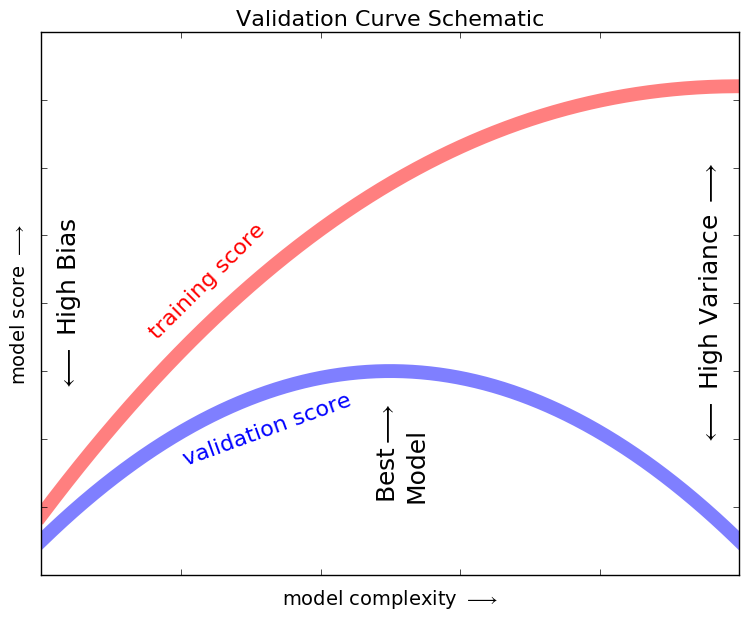

In [7]:
    x = np.linspace(0, 1, 1000)
    y1 = -(x - 0.5) ** 2
    y2 = y1 - 0.33 + np.exp(x - 1)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.plot(x, y2, lw=10, alpha=0.5, color='red')
    ax.plot(x, y1, lw=10, alpha=0.5, color='blue')

    ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='red')
    ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='blue')

    ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18,
            rotation=90, va='center')
    ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$',
            size=18, rotation=90, ha='right', va='center')
    ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18,
            rotation=90, va='center')

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.3, 0.5)

    ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
    ax.set_ylabel(r'model score $\longrightarrow$', size=14)

    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_title("Validation Curve Schematic", size=16)
    plt.savefig("images/notebook/validation_curve.png")
    plt.show()